<a href="https://colab.research.google.com/github/Isum1012/w2084453_DSPL_Week7-/blob/main/DSPL_TUT7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Task 1:load the dataset into a new Pandas data frame.

#import neccesary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#import dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/diabetes.csv")

In [ ]:
#Print out the first few rows
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# TASK 2: Compute median blood pressure for patients diagnosed with diabetes
median_blood_pressure = df[df['Outcome'] == 1]['BloodPressure'].median()
print("Median Blood Pressure for diagnosed patients:", median_blood_pressure)

Median Blood Pressure for diagnosed patients: 74.0


In [ ]:
# TASK 3: Identify the target variable and check dataset balance
class_distribution = df['Outcome'].value_counts(normalize=True)
print("\nClass Distribution:\n", class_distribution)


Class Distribution:
 Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64


In [ ]:
# TASK 4: Prepare data for modeling by separating features (X) and target variable (Y)
X = df.drop(columns=['Outcome'])
Y = df['Outcome']

# Display shapes of X and Y
print("\nShape of X:", X.shape)
print("Shape of Y:", Y.shape)


Shape of X: (768, 8)
Shape of Y: (768,)


 Task 5 : Explain the purpose of the following Python statements
 The train_test_split function splits the dataset into training and testing sets.
 test_size = 0.2 means 20% of the data is used for testing and 80% for training.
 random_state = 1 ensures reproducibility of the split.
 stratify = y ensures that the proportion of classes in y is preserved in both the training and testing sets.

In [ ]:
# Task 6 : modify the code from TASK5 so that a train-test split of 3:1 is obtained
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=1, stratify=Y)

# Check the shape of the splits
print("Training set size:", X_train.shape, y_train.shape)
print("Testing set size:", X_test.shape, y_test.shape)

Training set size: (576, 8) (576,)
Testing set size: (192, 8) (192,)


In [ ]:
# Task 7 : Fit a DecisionTreeClassifier to training dataset
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Create and train the model
clf = DecisionTreeClassifier(random_state=1)
clf.fit(X_train, y_train)

# Make predictions
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

# Evaluate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 1.0
Testing Accuracy: 0.7239583333333334


 training accuracy is much higher than testing accuracy so the model is overfitting

In [ ]:
# Task 8 : Check for Overfitting
if train_accuracy > test_accuracy + 0.1:
    print("Evidence of overfitting: Training accuracy is significantly higher than testing accuracy.")
else:
    print("No strong evidence of overfitting.")


Evidence of overfitting: Training accuracy is significantly higher than testing accuracy.


Task 9 Class 0 (Non-diabetic): High recall (0.89) - Model correctly identifies most non-diabetic cases.
Class 1 (Diabetic): Lower recall (0.50)- Model misses many actual diabetes cases which could be a concern for healthcare applications.

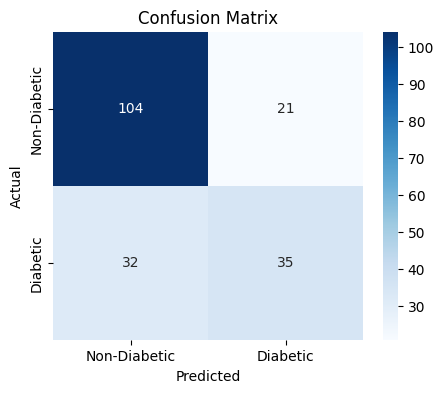

              precision    recall  f1-score   support

           0       0.76      0.83      0.80       125
           1       0.62      0.52      0.57        67

    accuracy                           0.72       192
   macro avg       0.69      0.68      0.68       192
weighted avg       0.72      0.72      0.72       192



In [ ]:
 # Task 10 : Create a Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Generate predictions on test data
y_test_pred = clf.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Display confusion matrix as a heatmap
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Non-Diabetic", "Diabetic"], yticklabels=["Non-Diabetic", "Diabetic"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Print classification report for more insights
print(classification_report(y_test, y_test_pred))


[Text(0.44249260355029585, 0.9642857142857143, 'Glucose <= 127.5\ngini = 0.454\nsamples = 100.0%\nvalue = [0.651, 0.349]\nclass = Non-Diabetic'),
 Text(0.16863905325443787, 0.8928571428571429, 'Age <= 28.5\ngini = 0.3\nsamples = 62.3%\nvalue = [0.816, 0.184]\nclass = Non-Diabetic'),
 Text(0.30556582840236685, 0.9285714285714286, 'True  '),
 Text(0.09467455621301775, 0.8214285714285714, 'BMI <= 45.4\ngini = 0.131\nsamples = 34.4%\nvalue = [0.929, 0.071]\nclass = Non-Diabetic'),
 Text(0.07100591715976332, 0.75, 'Pregnancies <= 7.5\ngini = 0.116\nsamples = 33.9%\nvalue = [0.938, 0.062]\nclass = Non-Diabetic'),
 Text(0.05917159763313609, 0.6785714285714286, 'BMI <= 32.3\ngini = 0.107\nsamples = 33.7%\nvalue = [0.943, 0.057]\nclass = Non-Diabetic'),
 Text(0.023668639053254437, 0.6071428571428571, 'DiabetesPedigreeFunction <= 0.672\ngini = 0.017\nsamples = 20.3%\nvalue = [0.991, 0.009]\nclass = Non-Diabetic'),
 Text(0.011834319526627219, 0.5357142857142857, 'gini = 0.0\nsamples = 17.7%\nvalu

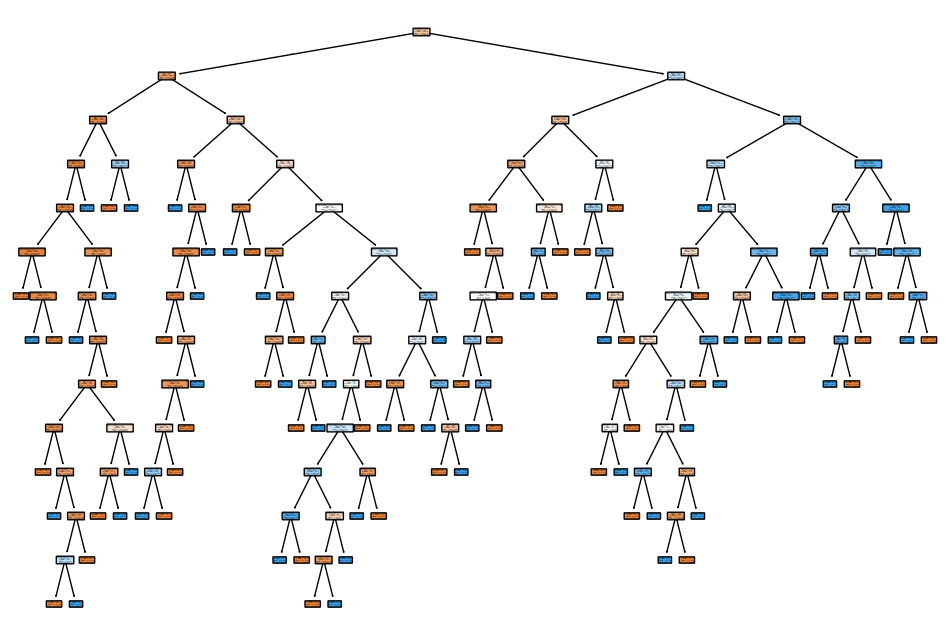

In [ ]:
# Task 11 : Visualize the Decision Tree
from sklearn.tree import plot_tree
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=["Non-Diabetic", "Diabetic"], rounded=True, proportion=True)

In [ ]:
# Task 12 : Identify and Rank Important Features from the Decision Tree

# Get feature importance scores from the Decision Tree model
feature_importances = clf.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Display ranked features
print(feature_importance_df)

                    Feature  Importance
1                   Glucose    0.331583
5                       BMI    0.169211
6  DiabetesPedigreeFunction    0.138457
7                       Age    0.117953
2             BloodPressure    0.108247
0               Pregnancies    0.050755
4                   Insulin    0.044033
3             SkinThickness    0.039761



KNN Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.85      0.77       125
           1       0.55      0.34      0.42        67

    accuracy                           0.67       192
   macro avg       0.63      0.60      0.60       192
weighted avg       0.65      0.67      0.65       192



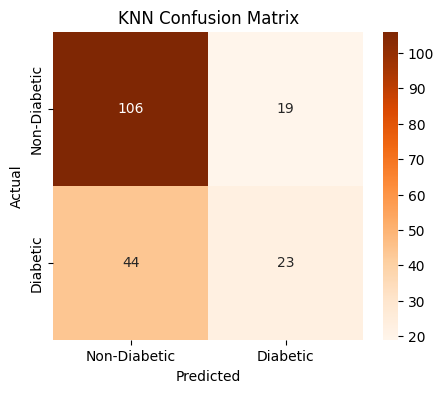

In [ ]:
#TASK 13: Train and Compare with K-Nearest Neighbors (KNN)
from sklearn.neighbors import KNeighborsClassifier

# Create and train the KNN model
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)

# Make predictions
y_test_pred_knn = knn.predict(X_test)

# Evaluate KNN model performance
print("\nKNN Classification Report:")
print(classification_report(y_test, y_test_pred_knn))

# Confusion Matrix for KNN
cm_knn = confusion_matrix(y_test, y_test_pred_knn)

# Plot Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Oranges', xticklabels=["Non-Diabetic", "Diabetic"], yticklabels=["Non-Diabetic", "Diabetic"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("KNN Confusion Matrix")
plt.show()

In [ ]:
# Task 14: Load Data and Identify Two Geographic Features
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/pm25_2016_2020_v1.csv")
print(df.columns)

Index(['aqs_id', 'date_local', 'latitude_x', 'longitude_x', 'elevation',
       'dominant_source', 'measurement_scale', 'monitoring_objective', 'tavg',
       'tmin', 'tmax', 'prcp', 'snow', 'wdir', 'wspd', 'wpgt', 'pres', 'tsun',
       'arithmetic_mean_a', 'arithmetic_mean_b', 'poc_a', 'poc_b',
       'meth_type_a', 'meth_type_b', 'method_code_a', 'method_code_b',
       'monitor_type_a', 'monitor_type_b'],
      dtype='object')


Latitude and Longitude are commonly used for geographic distribution

In [ ]:
# Task 15 : Extract Two Geographic Columns into a New DataFrame

X = df[['latitude_x', 'longitude_x']]

# Display first few rows
print(X.head())

   latitude_x  longitude_x
0   39.024265   -95.711275
1   39.024265   -95.711275
2   39.024265   -95.711275
3   39.024265   -95.711275
4   39.024265   -95.711275


In [ ]:
# Task 16 : Explain the K-Means Code
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=6)
X["Cluster"] = kmeans.fit_predict(X)
X["Cluster"] = X["Cluster"].astype("category")

<ipython-input-28-e6bd60ad75f6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"] = kmeans.fit_predict(X)
<ipython-input-28-e6bd60ad75f6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"] = X["Cluster"].astype("category")


In [ ]:
# Task 17 : Modify the Code to Use 5 Clusters and Count Observations
# Apply KMeans with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=1)
X["Cluster"] = kmeans.fit_predict(X)
X["Cluster"] = X["Cluster"].astype("category")

# Count number of observations per cluster
cluster_counts = X["Cluster"].value_counts()
print(cluster_counts)

Cluster
2    31360
0    29932
3    24061
4    19582
1    11777
Name: count, dtype: int64


<ipython-input-29-3ad720f0b34b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"] = kmeans.fit_predict(X)
<ipython-input-29-3ad720f0b34b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"] = X["Cluster"].astype("category")


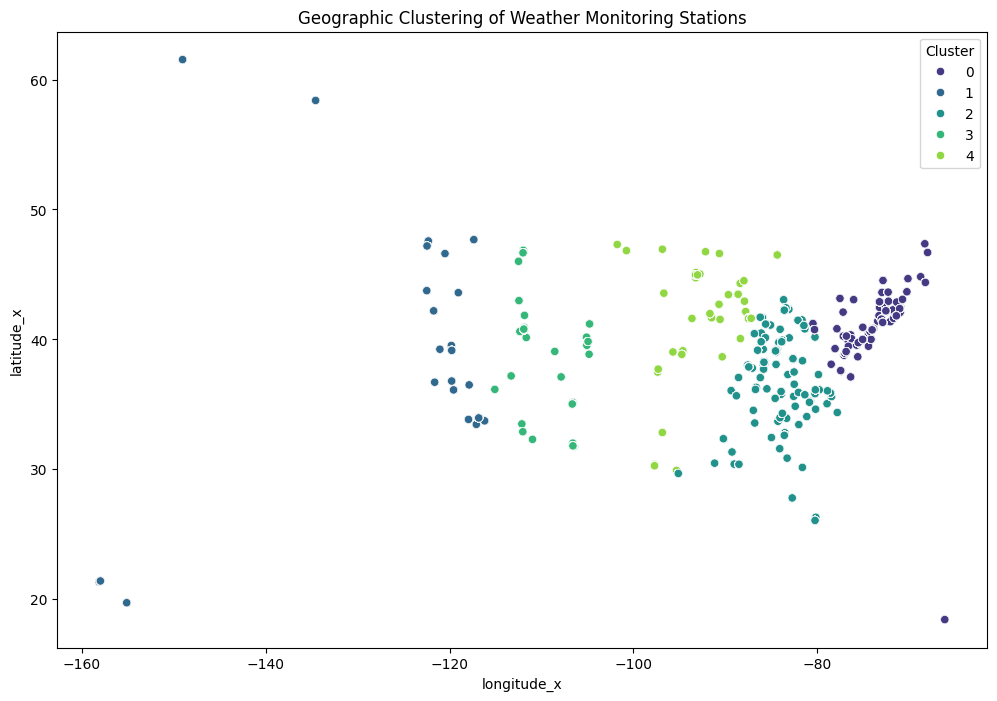

In [ ]:
# Task 18 : Fix and Run the Cluster Visualization Code
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(12,8))

# Plot scatter plot with clusters
sns.scatterplot(x=X["longitude_x"], y=X["latitude_x"], hue=X["Cluster"], palette="viridis")

# Add labels and title
plt.xlabel("longitude_x")
plt.ylabel("latitude_x")
plt.title("Geographic Clustering of Weather Monitoring Stations")

# Show plot
plt.show()